313/313 [==============================] - 2s 3ms/step - loss: 2.1328 - accuracy: 0.3610
evaluate loss: 1.6253474950790405
evaluate acc: 0.6909999847412109


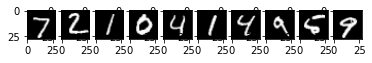

[7 3 1 0 4 1 4 9 2 7]


In [7]:
# 연습 문제
# 필기체 문자 인식하기
# MNIST 분류 코드를 읽고 모델 생성, 학습, 분류하기

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
%matplotlib inline

# 데이터 셋 가져오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:1000]

# 모델 생성하기
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 모델 학습시키기
model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), "gray")
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)